In [1]:
import numpy as np
import itertools

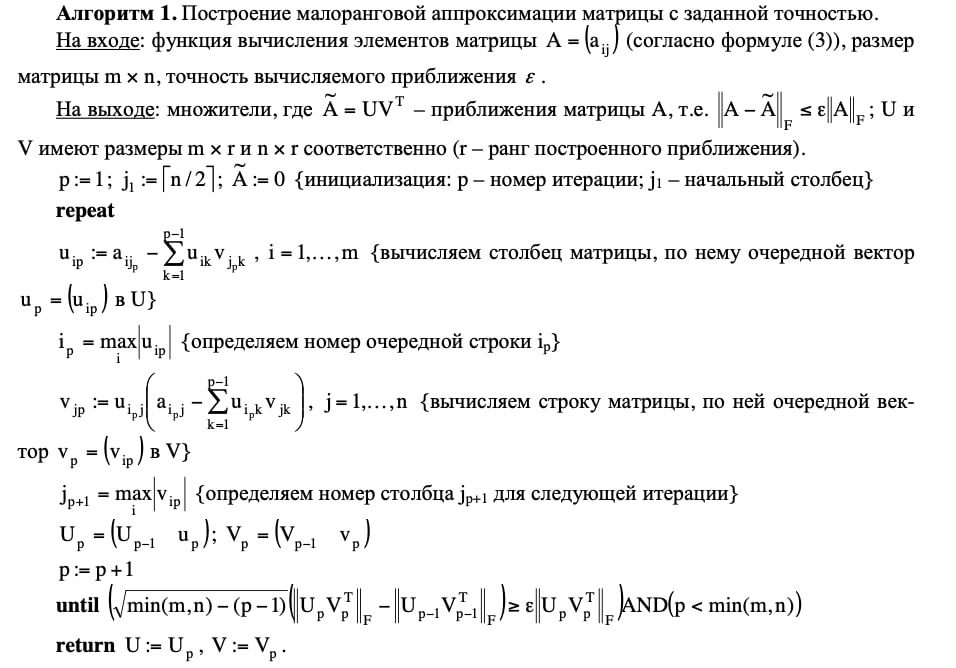

In [2]:
def  Incomplete_cross(A: np.ndarray, r:int, epsilon: float):
    '''
    Функция находит неполная крестовая аппроксимация матрицы A

    :param A: np.ndarray размера n x r (исходная матрица)
    :r: int ранг построенной малоранговой аппроксимации
    :epsilon: float требуемая точность построенной малоранговой аппроксимации

    :return u,v: np.ndarray размера n x r, np.ndarray размера m x r
    '''
    # Начальная инициализация
    p=1
    m, n=A.shape
    j_p=(n//2)
    u=np.zeros([m,r])
    v=np.zeros([n,r])
    while ((np.sqrt(min(m,n)-(p-1))*(np.linalg.norm(u[:,:p]@v[:,:p].T)-np.linalg.norm(u[:,:(p-1)]@v[:,:(p-1)].T))>=epsilon*np.linalg.norm(u[:,:p]@v[:,:p].T)) and (p<min(n,m))):
        u[:,p-1]=A[:,j_p]-u[:,:(p-1)] @ v[j_p,:(p-1)].T
        i_p=np.argmax(u[:,p-1])
        v[:,p-1]=A[i_p,:].T-v[:,:(p-1)] @ u[i_p,:(p-1)].T
        j_p=np.argmax(v[:,p-1])
        p=p+1
    return u,v
    